In [75]:
# importing data dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [76]:
# importing CDV data file
dataset = pd.read_csv('car data.csv')

In [77]:
# checking rows and cols of the data
dataset.shape

(301, 9)

In [ ]:
# getting info regarding the dataset
dataset.info()

In [ ]:
#checking null values in columns
dataset.isnull().sum()

In [ ]:
# getting value counts of textual data
print(dataset.Fuel_Type.value_counts())
print(dataset.Transmission.value_counts())
print(dataset.Seller_Type.value_counts())

In [81]:
# replacing text data to numeric data
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
dataset.head()

In [83]:
# allocating X and y variables
X = dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = dataset['Selling_Price']

In [84]:
#splitting data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
#applying linear model to train set
regressor = LinearRegression()
lassoRegressor = Lasso()
regressor.fit(X_train,y_train)
lassoRegressor.fit(X_train,y_train)

Lasso()

In [86]:
# predicting values of trainig set
x_pred = regressor.predict(X_test)
lasso_x_pred = lassoRegressor.predict(X_test)

In [87]:
#checking accuracy comparing values of predicted X with actual y
error_score = metrics.r2_score(y_test, x_pred)
print("Error score : Linear regression : ",error_score)
lasso_error_score = metrics.r2_score(y_test, lasso_x_pred)
print("Lasso regression : ",lasso_error_score)

Error score : Linear regression :  0.8401532365377697
Lasso regression :  0.8497457570738539


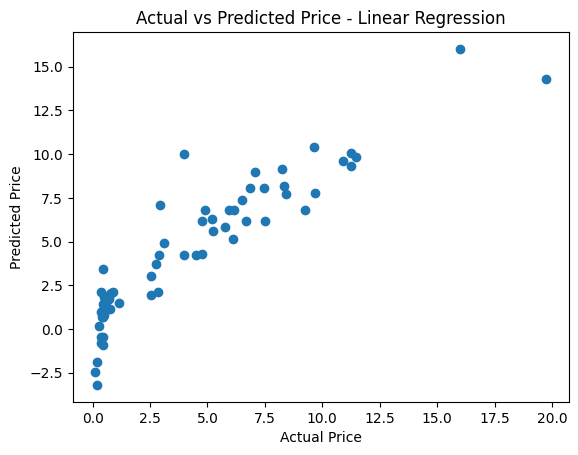

In [91]:
#visualing actual and predicted values
plt.scatter(y_test,x_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price - Linear Regression")
plt.show()

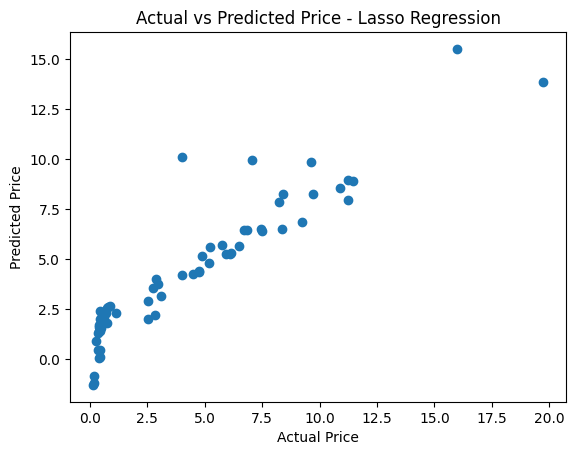

In [92]:
#visualing actual and predicted values
plt.scatter(y_test,lasso_x_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price - Lasso Regression")
plt.show()